#  Dogs Image Classification using pre-trained  ResNet18  CNN model  in AWS SageMaker

Using AWS Sagemaker to finetune a pretrained model that can perform image classification. You will have to use Sagemaker profiling, debugger, hyperparameter tuning and other good ML engineering practices to finish this project.
Will be using the dog breed classification dataset "https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip" , to classify between different 133 breeds of dog images.

In [1]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

^C


In [2]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3

from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [3]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

--2022-12-30 14:43:57--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.120.232
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.120.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

100%[====================================>] 1,132,023,110 45.7MB/s   in 29s    

2022-12-30 14:44:27 (36.8 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.

  inflating: dogImages/test/014.Basenji/Basenji_01029.jpg  
   creating: dogImages/test/015.Basset_hound/
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01034.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01044.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01059.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01067.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01071.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01080.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01085.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01097.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01106.jpg  
  inflating: dogImages/test/015.Basset_hound/Basset_hound_01121.jpg  
   creating: dogImages/test/016.Beagle/
  inflating: dogImages/test/016.Beagle/Beagle_01130.jpg  
  inflating: dogImages/test/016.Beagle/Beagle_01141.jpg  
  inflating: dogImages/test/016.Beagle

  inflating: dogImages/test/029.Border_collie/Border_collie_02035.jpg  
  inflating: dogImages/test/029.Border_collie/Border_collie_02039.jpg  
  inflating: dogImages/test/029.Border_collie/Border_collie_02051.jpg  
  inflating: dogImages/test/029.Border_collie/Border_collie_02053.jpg  
  inflating: dogImages/test/029.Border_collie/Border_collie_02056.jpg  
  inflating: dogImages/test/029.Border_collie/Border_collie_02077.jpg  
  inflating: dogImages/test/029.Border_collie/Border_collie_02081.jpg  
   creating: dogImages/test/030.Border_terrier/
  inflating: dogImages/test/030.Border_terrier/Border_terrier_02090.jpg  
  inflating: dogImages/test/030.Border_terrier/Border_terrier_02096.jpg  
  inflating: dogImages/test/030.Border_terrier/Border_terrier_02097.jpg  
  inflating: dogImages/test/030.Border_terrier/Border_terrier_02110.jpg  
  inflating: dogImages/test/030.Border_terrier/Border_terrier_02136.jpg  
  inflating: dogImages/test/030.Border_terrier/Border_terrier_02141.jpg  
  in

  inflating: dogImages/test/044.Cane_corso/Cane_corso_03172.jpg  
   creating: dogImages/test/045.Cardigan_welsh_corgi/
  inflating: dogImages/test/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03182.jpg  
  inflating: dogImages/test/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03185.jpg  
  inflating: dogImages/test/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03200.jpg  
  inflating: dogImages/test/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03202.jpg  
  inflating: dogImages/test/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03204.jpg  
  inflating: dogImages/test/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03240.jpg  
  inflating: dogImages/test/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03241.jpg  
   creating: dogImages/test/046.Cavalier_king_charles_spaniel/
  inflating: dogImages/test/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03253.jpg  
  inflating: dogImages/test/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03254.jpg  
  infla

  inflating: dogImages/test/063.English_springer_spaniel/English_springer_spaniel_04440.jpg  
  inflating: dogImages/test/063.English_springer_spaniel/English_springer_spaniel_04446.jpg  
  inflating: dogImages/test/063.English_springer_spaniel/English_springer_spaniel_04452.jpg  
  inflating: dogImages/test/063.English_springer_spaniel/English_springer_spaniel_04453.jpg  
  inflating: dogImages/test/063.English_springer_spaniel/English_springer_spaniel_04457.jpg  
  inflating: dogImages/test/063.English_springer_spaniel/English_springer_spaniel_04484.jpg  
  inflating: dogImages/test/063.English_springer_spaniel/English_springer_spaniel_04486.jpg  
   creating: dogImages/test/064.English_toy_spaniel/
  inflating: dogImages/test/064.English_toy_spaniel/English_toy_spaniel_04508.jpg  
  inflating: dogImages/test/064.English_toy_spaniel/English_toy_spaniel_04509.jpg  
  inflating: dogImages/test/064.English_toy_spaniel/English_toy_spaniel_04513.jpg  
  inflating: dogImages/test/064.Engli

  inflating: dogImages/test/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05469.jpg  
  inflating: dogImages/test/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05473.jpg  
  inflating: dogImages/test/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05486.jpg  
   creating: dogImages/test/081.Greyhound/
  inflating: dogImages/test/081.Greyhound/Greyhound_05526.jpg  
  inflating: dogImages/test/081.Greyhound/Greyhound_05530.jpg  
  inflating: dogImages/test/081.Greyhound/Greyhound_05539.jpg  
  inflating: dogImages/test/081.Greyhound/Greyhound_05542.jpg  
  inflating: dogImages/test/081.Greyhound/Greyhound_05552.jpg  
  inflating: dogImages/test/081.Greyhound/Greyhound_05560.jpg  
  inflating: dogImages/test/081.Greyhound/Greyhound_05565.jpg  
   creating: dogImages/test/082.Havanese/
  inflating: dogImages/test/082.Havanese/Havanese_05566.jpg  
  inflating: dogImages/test/082.Havanese/Havanese_05571.jpg  
  inflating: dogImages/test/082.Havanese/Havanese

  inflating: dogImages/test/101.Maltese/Maltese_06754.jpg  
  inflating: dogImages/test/101.Maltese/Maltese_06757.jpg  
  inflating: dogImages/test/101.Maltese/Maltese_06766.jpg  
   creating: dogImages/test/102.Manchester_terrier/
  inflating: dogImages/test/102.Manchester_terrier/Manchester_terrier_06778.jpg  
  inflating: dogImages/test/102.Manchester_terrier/Manchester_terrier_06799.jpg  
  inflating: dogImages/test/102.Manchester_terrier/Manchester_terrier_06805.jpg  
   creating: dogImages/test/103.Mastiff/
  inflating: dogImages/test/103.Mastiff/Mastiff_06815.jpg  
  inflating: dogImages/test/103.Mastiff/Mastiff_06825.jpg  
  inflating: dogImages/test/103.Mastiff/Mastiff_06827.jpg  
  inflating: dogImages/test/103.Mastiff/Mastiff_06836.jpg  
  inflating: dogImages/test/103.Mastiff/Mastiff_06847.jpg  
  inflating: dogImages/test/103.Mastiff/Mastiff_06873.jpg  
  inflating: dogImages/test/103.Mastiff/Mastiff_06878.jpg  
   creating: dogImages/test/104.Miniature_schnauzer/
  inflat

  inflating: dogImages/test/120.Pharaoh_hound/Pharaoh_hound_07750.jpg  
   creating: dogImages/test/121.Plott/
  inflating: dogImages/test/121.Plott/Plott_07792.jpg  
  inflating: dogImages/test/121.Plott/Plott_07795.jpg  
  inflating: dogImages/test/121.Plott/Plott_07797.jpg  
   creating: dogImages/test/122.Pointer/
  inflating: dogImages/test/122.Pointer/Pointer_07812.jpg  
  inflating: dogImages/test/122.Pointer/Pointer_07821.jpg  
  inflating: dogImages/test/122.Pointer/Pointer_07827.jpg  
  inflating: dogImages/test/122.Pointer/Pointer_07838.jpg  
   creating: dogImages/test/123.Pomeranian/
  inflating: dogImages/test/123.Pomeranian/Pomeranian_07857.jpg  
  inflating: dogImages/test/123.Pomeranian/Pomeranian_07858.jpg  
  inflating: dogImages/test/123.Pomeranian/Pomeranian_07861.jpg  
  inflating: dogImages/test/123.Pomeranian/Pomeranian_07873.jpg  
  inflating: dogImages/test/123.Pomeranian/Pomeranian_07897.jpg  
   creating: dogImages/test/124.Poodle/
  inflating: dogImages/tes

  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00061.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00062.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00063.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00064.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00065.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00066.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00067.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00069.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00070.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00072.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00073.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00075.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affenpinscher_00076.jpg  
  inflating: dogImages/train/001.Affenpinscher/Affe

  inflating: dogImages/train/004.Akita/Akita_00225.jpg  
  inflating: dogImages/train/004.Akita/Akita_00226.jpg  
  inflating: dogImages/train/004.Akita/Akita_00228.jpg  
  inflating: dogImages/train/004.Akita/Akita_00229.jpg  
  inflating: dogImages/train/004.Akita/Akita_00230.jpg  
  inflating: dogImages/train/004.Akita/Akita_00231.jpg  
  inflating: dogImages/train/004.Akita/Akita_00232.jpg  
  inflating: dogImages/train/004.Akita/Akita_00233.jpg  
  inflating: dogImages/train/004.Akita/Akita_00234.jpg  
  inflating: dogImages/train/004.Akita/Akita_00236.jpg  
  inflating: dogImages/train/004.Akita/Akita_00238.jpg  
  inflating: dogImages/train/004.Akita/Akita_00239.jpg  
  inflating: dogImages/train/004.Akita/Akita_00240.jpg  
  inflating: dogImages/train/004.Akita/Akita_00241.jpg  
  inflating: dogImages/train/004.Akita/Akita_00242.jpg  
  inflating: dogImages/train/004.Akita/Akita_00243.jpg  
  inflating: dogImages/train/004.Akita/Akita_00245.jpg  
  inflating: dogImages/train/00

  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00389.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00391.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00392.jpg  
  inflating: dogImages/train/005.Alaskan_malamute/Alaskan_malamute_00393.jpg  
   creating: dogImages/train/006.American_eskimo_dog/
  inflating: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00394.jpg  
  inflating: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00395.jpg  
  inflating: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00396.jpg  
  inflating: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00397.jpg  
  inflating: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00398.jpg  
  inflating: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00399.jpg  
  inflating: dogImages/train/006.American_eskimo_dog/American_eskimo_dog_00400.jpg  
  inflating: dogImages/train/006.Am

  inflating: dogImages/train/007.American_foxhound/American_foxhound_00532.jpg  
  inflating: dogImages/train/007.American_foxhound/American_foxhound_00533.jpg  
  inflating: dogImages/train/007.American_foxhound/American_foxhound_00534.jpg  
  inflating: dogImages/train/007.American_foxhound/American_foxhound_00536.jpg  
   creating: dogImages/train/008.American_staffordshire_terrier/
  inflating: dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00537.jpg  
  inflating: dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00541.jpg  
  inflating: dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00542.jpg  
  inflating: dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00543.jpg  
  inflating: dogImages/train/008.American_staffordshire_terrier/American_staffordshire_terrier_00545.jpg  
  inflating: dogImages/train/008.American_staffordshire_terrier/American_sta

  inflating: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00689.jpg  
  inflating: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00691.jpg  
  inflating: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00692.jpg  
  inflating: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00693.jpg  
  inflating: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00694.jpg  
  inflating: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00696.jpg  
  inflating: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00698.jpg  
  inflating: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00699.jpg  
  inflating: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00700.jpg  
  inflating: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00701.jpg  
  inflating: dogImages/train/010.Anatolian_shepherd_dog/Anatolian_shepherd_dog_00702.jpg  

  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00828.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00829.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00831.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00832.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00833.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00834.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00835.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00837.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00838.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00839.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_shepherd_00840.jpg  
  inflating: dogImages/train/012.Australian_shepherd/Australian_s

  inflating: dogImages/train/014.Basenji/Basenji_00976.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00977.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00979.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00980.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00982.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00983.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00984.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00986.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00988.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00989.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00990.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00991.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00992.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00993.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00994.jpg  
  inflating: dogImages/train/014.Basenji/Basenji_00995.jpg  
  inflating: dogImages/t

  inflating: dogImages/train/018.Beauceron/Beauceron_01308.jpg  
  inflating: dogImages/train/018.Beauceron/Beauceron_01309.jpg  
  inflating: dogImages/train/018.Beauceron/Beauceron_01311.jpg  
  inflating: dogImages/train/018.Beauceron/Beauceron_01312.jpg  
  inflating: dogImages/train/018.Beauceron/Beauceron_01313.jpg  
  inflating: dogImages/train/018.Beauceron/Beauceron_01314.jpg  
  inflating: dogImages/train/018.Beauceron/Beauceron_01315.jpg  
  inflating: dogImages/train/018.Beauceron/Beauceron_01316.jpg  
  inflating: dogImages/train/018.Beauceron/Beauceron_01317.jpg  
  inflating: dogImages/train/018.Beauceron/Beauceron_01320.jpg  
  inflating: dogImages/train/018.Beauceron/Beauceron_01321.jpg  
  inflating: dogImages/train/018.Beauceron/Beauceron_01322.jpg  
  inflating: dogImages/train/018.Beauceron/Beauceron_01323.jpg  
  inflating: dogImages/train/018.Beauceron/Beauceron_01324.jpg  
  inflating: dogImages/train/018.Beauceron/Beauceron_01325.jpg  
  inflating: dogImages/tr

  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01501.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01502.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01503.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01504.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01505.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01506.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01507.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01508.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01509.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01511.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01512.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Belgian_sheepdog_01513.jpg  
  inflating: dogImages/train/021.Belgian_sheepdog/Be

  inflating: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01665.jpg  
  inflating: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01666.jpg  
  inflating: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01667.jpg  
  inflating: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01668.jpg  
  inflating: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01669.jpg  
  inflating: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01670.jpg  
  inflating: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01671.jpg  
  inflating: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01674.jpg  
  inflating: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01675.jpg  
  inflating: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01676.jpg  
  inflating: dogImages/train/023.Bernese_mountain_dog/Bernese_mountain_dog_01677.jpg  
  inflating: dogImages/train/023.Bernese_mo

  inflating: dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01806.jpg  
  inflating: dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01807.jpg  
  inflating: dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01808.jpg  
  inflating: dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01809.jpg  
  inflating: dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01810.jpg  
  inflating: dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01811.jpg  
  inflating: dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01812.jpg  
  inflating: dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01813.jpg  
  inflating: dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01814.jpg  
  inflating: dogImages/train/025.Black_and_tan_coonhound/Black_and_tan_coonhound_01815.jpg  
  inflating: dogImages/train/025.Black_and_tan_coonhound/Black_and_tan

  inflating: dogImages/train/027.Bloodhound/Bloodhound_01930.jpg  
  inflating: dogImages/train/027.Bloodhound/Bloodhound_01933.jpg  
  inflating: dogImages/train/027.Bloodhound/Bloodhound_01936.jpg  
  inflating: dogImages/train/027.Bloodhound/Bloodhound_01937.jpg  
  inflating: dogImages/train/027.Bloodhound/Bloodhound_01938.jpg  
  inflating: dogImages/train/027.Bloodhound/Bloodhound_01939.jpg  
  inflating: dogImages/train/027.Bloodhound/Bloodhound_01940.jpg  
  inflating: dogImages/train/027.Bloodhound/Bloodhound_01941.jpg  
  inflating: dogImages/train/027.Bloodhound/Bloodhound_01942.jpg  
  inflating: dogImages/train/027.Bloodhound/Bloodhound_01943.jpg  
  inflating: dogImages/train/027.Bloodhound/Bloodhound_01944.jpg  
  inflating: dogImages/train/027.Bloodhound/Bloodhound_01945.jpg  
  inflating: dogImages/train/027.Bloodhound/Bloodhound_01946.jpg  
  inflating: dogImages/train/027.Bloodhound/Bloodhound_01947.jpg  
  inflating: dogImages/train/027.Bloodhound/Bloodhound_01948.j

  inflating: dogImages/train/030.Border_terrier/Border_terrier_02104.jpg  
  inflating: dogImages/train/030.Border_terrier/Border_terrier_02105.jpg  
  inflating: dogImages/train/030.Border_terrier/Border_terrier_02106.jpg  
  inflating: dogImages/train/030.Border_terrier/Border_terrier_02107.jpg  
  inflating: dogImages/train/030.Border_terrier/Border_terrier_02108.jpg  
  inflating: dogImages/train/030.Border_terrier/Border_terrier_02109.jpg  
  inflating: dogImages/train/030.Border_terrier/Border_terrier_02111.jpg  
  inflating: dogImages/train/030.Border_terrier/Border_terrier_02112.jpg  
  inflating: dogImages/train/030.Border_terrier/Border_terrier_02113.jpg  
  inflating: dogImages/train/030.Border_terrier/Border_terrier_02114.jpg  
  inflating: dogImages/train/030.Border_terrier/Border_terrier_02115.jpg  
  inflating: dogImages/train/030.Border_terrier/Border_terrier_02116.jpg  
  inflating: dogImages/train/030.Border_terrier/Border_terrier_02117.jpg  
  inflating: dogImages/tr

  inflating: dogImages/train/032.Boston_terrier/Boston_terrier_02295.jpg  
  inflating: dogImages/train/032.Boston_terrier/Boston_terrier_02296.jpg  
  inflating: dogImages/train/032.Boston_terrier/Boston_terrier_02298.jpg  
  inflating: dogImages/train/032.Boston_terrier/Boston_terrier_02300.jpg  
  inflating: dogImages/train/032.Boston_terrier/Boston_terrier_02302.jpg  
  inflating: dogImages/train/032.Boston_terrier/Boston_terrier_02303.jpg  
   creating: dogImages/train/033.Bouvier_des_flandres/
  inflating: dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02306.jpg  
  inflating: dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02307.jpg  
  inflating: dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02308.jpg  
  inflating: dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02309.jpg  
  inflating: dogImages/train/033.Bouvier_des_flandres/Bouvier_des_flandres_02310.jpg  
  inflating: dogImages/train/033.Bouvier_des_flandres/Bouvie

  inflating: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02466.jpg  
  inflating: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02467.jpg  
  inflating: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02469.jpg  
  inflating: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02470.jpg  
  inflating: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02472.jpg  
  inflating: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02473.jpg  
  inflating: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02474.jpg  
  inflating: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02475.jpg  
  inflating: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02476.jpg  
  inflating: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02477.jpg  
  inflating: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02478.jpg  
  inflating: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02479.jpg  
  inflating: dogImages/train/035.Boykin_spaniel/Boykin_spaniel_02480.jpg  
  inflating: dogImages/tr

  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02662.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02663.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02664.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02666.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02668.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02669.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02670.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02671.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02673.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02674.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02675.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Brussels_griffon_02676.jpg  
  inflating: dogImages/train/038.Brussels_griffon/Br

  inflating: dogImages/train/040.Bulldog/Bulldog_02858.jpg  
  inflating: dogImages/train/040.Bulldog/Bulldog_02859.jpg  
  inflating: dogImages/train/040.Bulldog/Bulldog_02860.jpg  
  inflating: dogImages/train/040.Bulldog/Bulldog_02861.jpg  
  inflating: dogImages/train/040.Bulldog/Bulldog_02862.jpg  
  inflating: dogImages/train/040.Bulldog/Bulldog_02863.jpg  
  inflating: dogImages/train/040.Bulldog/Bulldog_02864.jpg  
  inflating: dogImages/train/040.Bulldog/Bulldog_02865.jpg  
  inflating: dogImages/train/040.Bulldog/Bulldog_02866.jpg  
  inflating: dogImages/train/040.Bulldog/Bulldog_02867.jpg  
  inflating: dogImages/train/040.Bulldog/Bulldog_02868.jpg  
  inflating: dogImages/train/040.Bulldog/Bulldog_02869.jpg  
  inflating: dogImages/train/040.Bulldog/Bulldog_02870.jpg  
  inflating: dogImages/train/040.Bulldog/Bulldog_02871.jpg  
   creating: dogImages/train/041.Bullmastiff/
  inflating: dogImages/train/041.Bullmastiff/Bullmastiff_02873.jpg  
  inflating: dogImages/train/04

  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03040.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03041.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03042.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03043.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03044.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03045.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03046.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03047.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03048.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03049.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03050.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03052.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03053.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03055.jpg  
  inflating: dogImages/train/043.Canaan_dog/Canaan_dog_03056.j

  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03208.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03209.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03210.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03211.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03212.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03213.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03214.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03215.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03216.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03217.jpg  
  inflating: dogImages/train/045.Cardigan_welsh_corgi/Cardigan_welsh_corgi_03218.jpg  
  inflating: dogImages/train/045.Cardigan_w

  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03389.jpg  
  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03392.jpg  
  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03394.jpg  
  inflating: dogImages/train/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03396.jpg  
   creating: dogImages/train/048.Chihuahua/
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03398.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03399.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03400.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03401.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03402.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03404.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03406.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03407.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_034

  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03572.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03573.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03574.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03576.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03577.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03578.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03579.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03581.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03582.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03583.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03584.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Chinese_shar-pei_03585.jpg  
  inflating: dogImages/train/050.Chinese_shar-pei/Ch

  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03741.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03744.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03745.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03746.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03747.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03749.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03750.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03751.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03752.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03753.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03754.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03755.jpg  
  inflating: dogImages/train/053.Cocker_spaniel/Cocker_spaniel_03756.jpg  
  inflating: dogImages/tr

  inflating: dogImages/train/056.Dachshund/Dachshund_03927.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03928.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03930.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03931.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03932.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03933.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03934.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03935.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03937.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03938.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03939.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03940.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03941.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03942.jpg  
  inflating: dogImages/train/056.Dachshund/Dachshund_03943.jpg  
  inflating: dogImages/tr

  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04166.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04167.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04168.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04170.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04171.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04172.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04173.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04174.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04175.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04176.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04179.jpg  
  inflating: dogImages/train/059.Doberman_pinscher/Doberman_pinscher_04180.jpg  
  inflating: dogImages/train

  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04321.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04324.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04325.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04326.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04327.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04328.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04329.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04331.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04332.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04334.jpg  
  inflating: dogImages/train/061.English_cocker_spaniel/English_cocker_spaniel_04335.jpg  

  inflating: dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04519.jpg  
  inflating: dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04520.jpg  
  inflating: dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04521.jpg  
  inflating: dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04522.jpg  
  inflating: dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04523.jpg  
  inflating: dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04524.jpg  
  inflating: dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04525.jpg  
  inflating: dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04526.jpg  
  inflating: dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04527.jpg  
  inflating: dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04528.jpg  
  inflating: dogImages/train/064.English_toy_spaniel/English_toy_spaniel_04529.jpg  
  inflating: dogImages/train/064.English_toy_spaniel/English_toy_

  inflating: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04713.jpg  
  inflating: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04714.jpg  
  inflating: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04715.jpg  
  inflating: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04716.jpg  
  inflating: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04717.jpg  
  inflating: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04719.jpg  
  inflating: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04720.jpg  
  inflating: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04721.jpg  
  inflating: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04722.jpg  
  inflating: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04723.jpg  
  inflating: dogImages/train/068.Flat-coated_retriever/Flat-coated_retriever_04724.jpg  
  inflating: dogImage

  inflating: dogImages/train/070.German_pinscher/German_pinscher_04857.jpg  
  inflating: dogImages/train/070.German_pinscher/German_pinscher_04858.jpg  
  inflating: dogImages/train/070.German_pinscher/German_pinscher_04859.jpg  
  inflating: dogImages/train/070.German_pinscher/German_pinscher_04860.jpg  
  inflating: dogImages/train/070.German_pinscher/German_pinscher_04864.jpg  
  inflating: dogImages/train/070.German_pinscher/German_pinscher_04865.jpg  
  inflating: dogImages/train/070.German_pinscher/German_pinscher_04866.jpg  
  inflating: dogImages/train/070.German_pinscher/German_pinscher_04867.jpg  
  inflating: dogImages/train/070.German_pinscher/German_pinscher_04868.jpg  
  inflating: dogImages/train/070.German_pinscher/German_pinscher_04869.jpg  
  inflating: dogImages/train/070.German_pinscher/German_pinscher_04870.jpg  
  inflating: dogImages/train/070.German_pinscher/German_pinscher_04872.jpg  
  inflating: dogImages/train/070.German_pinscher/German_pinscher_04873.jpg  

  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05023.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05024.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05025.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05026.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05028.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05029.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05030.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05032.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05033.jpg  
  inflating: dogImages/train/073.German_wirehaired_pointer/German_wirehaired_pointer_05034.jpg  
  inflating: dogImages/train/0

  inflating: dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05141.jpg  
  inflating: dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05142.jpg  
  inflating: dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05144.jpg  
  inflating: dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05145.jpg  
  inflating: dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05146.jpg  
  inflating: dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05147.jpg  
  inflating: dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05150.jpg  
  inflating: dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05151.jpg  
  inflating: dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05154.jpg  
  inflating: dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05155.jpg  
  inflating: dogImages/train/075.Glen_of_imaal_terrier/Glen_of_imaal_terrier_05157.jpg  
  inflating: dogImage

  inflating: dogImages/train/077.Gordon_setter/Gordon_setter_05301.jpg  
  inflating: dogImages/train/077.Gordon_setter/Gordon_setter_05303.jpg  
  inflating: dogImages/train/077.Gordon_setter/Gordon_setter_05305.jpg  
  inflating: dogImages/train/077.Gordon_setter/Gordon_setter_05306.jpg  
  inflating: dogImages/train/077.Gordon_setter/Gordon_setter_05307.jpg  
  inflating: dogImages/train/077.Gordon_setter/Gordon_setter_05308.jpg  
  inflating: dogImages/train/077.Gordon_setter/Gordon_setter_05309.jpg  
  inflating: dogImages/train/077.Gordon_setter/Gordon_setter_05311.jpg  
  inflating: dogImages/train/077.Gordon_setter/Gordon_setter_05313.jpg  
  inflating: dogImages/train/077.Gordon_setter/Gordon_setter_05314.jpg  
   creating: dogImages/train/078.Great_dane/
  inflating: dogImages/train/078.Great_dane/Great_dane_05315.jpg  
  inflating: dogImages/train/078.Great_dane/Great_dane_05316.jpg  
  inflating: dogImages/train/078.Great_dane/Great_dane_05317.jpg  
  inflating: dogImages/t

  inflating: dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05471.jpg  
  inflating: dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05472.jpg  
  inflating: dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05474.jpg  
  inflating: dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05475.jpg  
  inflating: dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05476.jpg  
  inflating: dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05477.jpg  
  inflating: dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05479.jpg  
  inflating: dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05480.jpg  
  inflating: dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05481.jpg  
  inflating: dogImages/train/080.Greater_swiss_mountain_dog/Greater_swiss_mountain_dog_05482.jpg  
  inflatin

  inflating: dogImages/train/082.Havanese/Havanese_05636.jpg  
  inflating: dogImages/train/082.Havanese/Havanese_05638.jpg  
  inflating: dogImages/train/082.Havanese/Havanese_05639.jpg  
  inflating: dogImages/train/082.Havanese/Havanese_05640.jpg  
   creating: dogImages/train/083.Ibizan_hound/
  inflating: dogImages/train/083.Ibizan_hound/Ibizan_hound_05643.jpg  
  inflating: dogImages/train/083.Ibizan_hound/Ibizan_hound_05644.jpg  
  inflating: dogImages/train/083.Ibizan_hound/Ibizan_hound_05645.jpg  
  inflating: dogImages/train/083.Ibizan_hound/Ibizan_hound_05646.jpg  
  inflating: dogImages/train/083.Ibizan_hound/Ibizan_hound_05648.jpg  
  inflating: dogImages/train/083.Ibizan_hound/Ibizan_hound_05649.jpg  
  inflating: dogImages/train/083.Ibizan_hound/Ibizan_hound_05650.jpg  
  inflating: dogImages/train/083.Ibizan_hound/Ibizan_hound_05651.jpg  
  inflating: dogImages/train/083.Ibizan_hound/Ibizan_hound_05652.jpg  
  inflating: dogImages/train/083.Ibizan_hound/Ibizan_hound_056

  inflating: dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05790.jpg  
  inflating: dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05791.jpg  
  inflating: dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05792.jpg  
  inflating: dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05793.jpg  
  inflating: dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05794.jpg  
  inflating: dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05795.jpg  
  inflating: dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05797.jpg  
  inflating: dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05798.jpg  
  inflating: dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05799.jpg  
  inflating: dogImages/train/085.Irish_red_and_white_setter/Irish_red_and_white_setter_05801.jpg  
  inflatin

  inflating: dogImages/train/087.Irish_terrier/Irish_terrier_05935.jpg  
  inflating: dogImages/train/087.Irish_terrier/Irish_terrier_05936.jpg  
  inflating: dogImages/train/087.Irish_terrier/Irish_terrier_05938.jpg  
  inflating: dogImages/train/087.Irish_terrier/Irish_terrier_05939.jpg  
  inflating: dogImages/train/087.Irish_terrier/Irish_terrier_05940.jpg  
  inflating: dogImages/train/087.Irish_terrier/Irish_terrier_05941.jpg  
  inflating: dogImages/train/087.Irish_terrier/Irish_terrier_05942.jpg  
  inflating: dogImages/train/087.Irish_terrier/Irish_terrier_05943.jpg  
  inflating: dogImages/train/087.Irish_terrier/Irish_terrier_05944.jpg  
  inflating: dogImages/train/087.Irish_terrier/Irish_terrier_05945.jpg  
  inflating: dogImages/train/087.Irish_terrier/Irish_terrier_05946.jpg  
  inflating: dogImages/train/087.Irish_terrier/Irish_terrier_05947.jpg  
  inflating: dogImages/train/087.Irish_terrier/Irish_terrier_05948.jpg  
  inflating: dogImages/train/087.Irish_terrier/Iris

  inflating: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06075.jpg  
  inflating: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06076.jpg  
  inflating: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06077.jpg  
  inflating: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06078.jpg  
  inflating: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06079.jpg  
  inflating: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06080.jpg  
  inflating: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06081.jpg  
  inflating: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06082.jpg  
  inflating: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06083.jpg  
  inflating: dogImages/train/089.Irish_wolfhound/Irish_wolfhound_06085.jpg  
   creating: dogImages/train/090.Italian_greyhound/
  inflating: dogImages/train/090.Italian_greyhound/Italian_greyhound_06086.jpg  
  inflating: dogImages/train/090.Italian_greyhound/Italian_greyhound_06089.jpg  
  inflating: dog

  inflating: dogImages/train/091.Japanese_chin/Japanese_chin_06228.jpg  
  inflating: dogImages/train/091.Japanese_chin/Japanese_chin_06229.jpg  
   creating: dogImages/train/092.Keeshond/
  inflating: dogImages/train/092.Keeshond/Keeshond_06230.jpg  
  inflating: dogImages/train/092.Keeshond/Keeshond_06231.jpg  
  inflating: dogImages/train/092.Keeshond/Keeshond_06232.jpg  
  inflating: dogImages/train/092.Keeshond/Keeshond_06233.jpg  
  inflating: dogImages/train/092.Keeshond/Keeshond_06235.jpg  
  inflating: dogImages/train/092.Keeshond/Keeshond_06236.jpg  
  inflating: dogImages/train/092.Keeshond/Keeshond_06237.jpg  
  inflating: dogImages/train/092.Keeshond/Keeshond_06239.jpg  
  inflating: dogImages/train/092.Keeshond/Keeshond_06240.jpg  
  inflating: dogImages/train/092.Keeshond/Keeshond_06241.jpg  
  inflating: dogImages/train/092.Keeshond/Keeshond_06242.jpg  
  inflating: dogImages/train/092.Keeshond/Keeshond_06243.jpg  
  inflating: dogImages/train/092.Keeshond/Keeshond_0624

  inflating: dogImages/train/095.Kuvasz/Kuvasz_06434.jpg  
  inflating: dogImages/train/095.Kuvasz/Kuvasz_06436.jpg  
  inflating: dogImages/train/095.Kuvasz/Kuvasz_06437.jpg  
  inflating: dogImages/train/095.Kuvasz/Kuvasz_06438.jpg  
  inflating: dogImages/train/095.Kuvasz/Kuvasz_06439.jpg  
  inflating: dogImages/train/095.Kuvasz/Kuvasz_06440.jpg  
  inflating: dogImages/train/095.Kuvasz/Kuvasz_06441.jpg  
  inflating: dogImages/train/095.Kuvasz/Kuvasz_06442.jpg  
  inflating: dogImages/train/095.Kuvasz/Kuvasz_06443.jpg  
  inflating: dogImages/train/095.Kuvasz/Kuvasz_06444.jpg  
   creating: dogImages/train/096.Labrador_retriever/
  inflating: dogImages/train/096.Labrador_retriever/Labrador_retriever_06445.jpg  
  inflating: dogImages/train/096.Labrador_retriever/Labrador_retriever_06446.jpg  
  inflating: dogImages/train/096.Labrador_retriever/Labrador_retriever_06447.jpg  
  inflating: dogImages/train/096.Labrador_retriever/Labrador_retriever_06449.jpg  
  inflating: dogImages/tr

  inflating: dogImages/train/098.Leonberger/Leonberger_06590.jpg  
  inflating: dogImages/train/098.Leonberger/Leonberger_06592.jpg  
  inflating: dogImages/train/098.Leonberger/Leonberger_06593.jpg  
  inflating: dogImages/train/098.Leonberger/Leonberger_06594.jpg  
  inflating: dogImages/train/098.Leonberger/Leonberger_06596.jpg  
  inflating: dogImages/train/098.Leonberger/Leonberger_06597.jpg  
  inflating: dogImages/train/098.Leonberger/Leonberger_06598.jpg  
  inflating: dogImages/train/098.Leonberger/Leonberger_06599.jpg  
  inflating: dogImages/train/098.Leonberger/Leonberger_06600.jpg  
  inflating: dogImages/train/098.Leonberger/Leonberger_06601.jpg  
  inflating: dogImages/train/098.Leonberger/Leonberger_06602.jpg  
  inflating: dogImages/train/098.Leonberger/Leonberger_06603.jpg  
  inflating: dogImages/train/098.Leonberger/Leonberger_06604.jpg  
  inflating: dogImages/train/098.Leonberger/Leonberger_06605.jpg  
  inflating: dogImages/train/098.Leonberger/Leonberger_06606.j

  inflating: dogImages/train/102.Manchester_terrier/Manchester_terrier_06788.jpg  
  inflating: dogImages/train/102.Manchester_terrier/Manchester_terrier_06789.jpg  
  inflating: dogImages/train/102.Manchester_terrier/Manchester_terrier_06790.jpg  
  inflating: dogImages/train/102.Manchester_terrier/Manchester_terrier_06791.jpg  
  inflating: dogImages/train/102.Manchester_terrier/Manchester_terrier_06792.jpg  
  inflating: dogImages/train/102.Manchester_terrier/Manchester_terrier_06793.jpg  
  inflating: dogImages/train/102.Manchester_terrier/Manchester_terrier_06794.jpg  
  inflating: dogImages/train/102.Manchester_terrier/Manchester_terrier_06795.jpg  
  inflating: dogImages/train/102.Manchester_terrier/Manchester_terrier_06796.jpg  
  inflating: dogImages/train/102.Manchester_terrier/Manchester_terrier_06797.jpg  
  inflating: dogImages/train/102.Manchester_terrier/Manchester_terrier_06800.jpg  
  inflating: dogImages/train/102.Manchester_terrier/Manchester_terrier_06801.jpg  
  in

  inflating: dogImages/train/104.Miniature_schnauzer/Miniature_schnauzer_06933.jpg  
   creating: dogImages/train/105.Neapolitan_mastiff/
  inflating: dogImages/train/105.Neapolitan_mastiff/Neapolitan_mastiff_06934.jpg  
  inflating: dogImages/train/105.Neapolitan_mastiff/Neapolitan_mastiff_06935.jpg  
  inflating: dogImages/train/105.Neapolitan_mastiff/Neapolitan_mastiff_06936.jpg  
  inflating: dogImages/train/105.Neapolitan_mastiff/Neapolitan_mastiff_06938.jpg  
  inflating: dogImages/train/105.Neapolitan_mastiff/Neapolitan_mastiff_06939.jpg  
  inflating: dogImages/train/105.Neapolitan_mastiff/Neapolitan_mastiff_06940.jpg  
  inflating: dogImages/train/105.Neapolitan_mastiff/Neapolitan_mastiff_06941.jpg  
  inflating: dogImages/train/105.Neapolitan_mastiff/Neapolitan_mastiff_06942.jpg  
  inflating: dogImages/train/105.Neapolitan_mastiff/Neapolitan_mastiff_06943.jpg  
  inflating: dogImages/train/105.Neapolitan_mastiff/Neapolitan_mastiff_06944.jpg  
  inflating: dogImages/train/105

  inflating: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07100.jpg  
  inflating: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07101.jpg  
  inflating: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07103.jpg  
  inflating: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07104.jpg  
  inflating: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07106.jpg  
  inflating: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07107.jpg  
  inflating: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07108.jpg  
  inflating: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07109.jpg  
  inflating: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07110.jpg  
  inflating: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07112.jpg  
  inflating: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07113.jpg  
  inflating: dogImages/train/108.Norwegian_buhund/Norwegian_buhund_07114.jpg  
  inflating: dogImages/train/108.Norwegian_buhund/No

  inflating: dogImages/train/111.Norwich_terrier/Norwich_terrier_07225.jpg  
  inflating: dogImages/train/111.Norwich_terrier/Norwich_terrier_07226.jpg  
  inflating: dogImages/train/111.Norwich_terrier/Norwich_terrier_07228.jpg  
  inflating: dogImages/train/111.Norwich_terrier/Norwich_terrier_07230.jpg  
  inflating: dogImages/train/111.Norwich_terrier/Norwich_terrier_07231.jpg  
  inflating: dogImages/train/111.Norwich_terrier/Norwich_terrier_07232.jpg  
  inflating: dogImages/train/111.Norwich_terrier/Norwich_terrier_07233.jpg  
  inflating: dogImages/train/111.Norwich_terrier/Norwich_terrier_07234.jpg  
  inflating: dogImages/train/111.Norwich_terrier/Norwich_terrier_07235.jpg  
  inflating: dogImages/train/111.Norwich_terrier/Norwich_terrier_07236.jpg  
  inflating: dogImages/train/111.Norwich_terrier/Norwich_terrier_07237.jpg  
  inflating: dogImages/train/111.Norwich_terrier/Norwich_terrier_07241.jpg  
  inflating: dogImages/train/111.Norwich_terrier/Norwich_terrier_07242.jpg  

  inflating: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07339.jpg  
  inflating: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07340.jpg  
  inflating: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07341.jpg  
  inflating: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07342.jpg  
  inflating: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07343.jpg  
  inflating: dogImages/train/112.Nova_scotia_duck_tolling_retriever/Nova_scotia_duck_tolling_retriever_07344.jpg  
   creating: dogImages/train/113.Old_english_sheepdog/
  inflating: dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07345.jpg  
  inflating: dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07346.jpg  
  inflating: dogImages/train/113.Old_english_sheepdog/Old_english_sheepdog_07347.

  inflating: dogImages/train/115.Papillon/Papillon_07478.jpg  
  inflating: dogImages/train/115.Papillon/Papillon_07479.jpg  
  inflating: dogImages/train/115.Papillon/Papillon_07481.jpg  
  inflating: dogImages/train/115.Papillon/Papillon_07482.jpg  
  inflating: dogImages/train/115.Papillon/Papillon_07483.jpg  
  inflating: dogImages/train/115.Papillon/Papillon_07485.jpg  
  inflating: dogImages/train/115.Papillon/Papillon_07486.jpg  
  inflating: dogImages/train/115.Papillon/Papillon_07488.jpg  
  inflating: dogImages/train/115.Papillon/Papillon_07489.jpg  
  inflating: dogImages/train/115.Papillon/Papillon_07490.jpg  
  inflating: dogImages/train/115.Papillon/Papillon_07491.jpg  
  inflating: dogImages/train/115.Papillon/Papillon_07492.jpg  
  inflating: dogImages/train/115.Papillon/Papillon_07493.jpg  
  inflating: dogImages/train/115.Papillon/Papillon_07494.jpg  
  inflating: dogImages/train/115.Papillon/Papillon_07497.jpg  
  inflating: dogImages/train/115.Papillon/Papillon_0749

  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07645.jpg  
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07646.jpg  
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07647.jpg  
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07648.jpg  
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07649.jpg  
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07650.jpg  
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07651.jpg  
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07653.jpg  
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07654.jpg  
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07655.jpg  
  inflating: dogImages/train/118.Pembroke_welsh_corgi/Pembroke_welsh_corgi_07656.jpg  
  inflating: dogImages/train/118.Pembroke_w

  inflating: dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07767.jpg  
  inflating: dogImages/train/120.Pharaoh_hound/Pharaoh_hound_07768.jpg  
   creating: dogImages/train/121.Plott/
  inflating: dogImages/train/121.Plott/Plott_07769.jpg  
  inflating: dogImages/train/121.Plott/Plott_07770.jpg  
  inflating: dogImages/train/121.Plott/Plott_07772.jpg  
  inflating: dogImages/train/121.Plott/Plott_07773.jpg  
  inflating: dogImages/train/121.Plott/Plott_07774.jpg  
  inflating: dogImages/train/121.Plott/Plott_07775.jpg  
  inflating: dogImages/train/121.Plott/Plott_07776.jpg  
  inflating: dogImages/train/121.Plott/Plott_07777.jpg  
  inflating: dogImages/train/121.Plott/Plott_07778.jpg  
  inflating: dogImages/train/121.Plott/Plott_07779.jpg  
  inflating: dogImages/train/121.Plott/Plott_07781.jpg  
  inflating: dogImages/train/121.Plott/Plott_07782.jpg  
  inflating: dogImages/train/121.Plott/Plott_07783.jpg  
  inflating: dogImages/train/121.Plott/Plott_07784.jpg  
  inflating: dog

  inflating: dogImages/train/124.Poodle/Poodle_07942.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07943.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07944.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07945.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07947.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07950.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07951.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07952.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07953.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07954.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07955.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07956.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07957.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07958.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07959.jpg  
  inflating: dogImages/train/124.Poodle/Poodle_07960.jpg  
   creating: dogImages/train/125.Portuguese_water_dog/
 

  inflating: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08114.jpg  
  inflating: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08115.jpg  
  inflating: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08117.jpg  
  inflating: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08118.jpg  
  inflating: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08119.jpg  
  inflating: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08120.jpg  
  inflating: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08121.jpg  
  inflating: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08122.jpg  
  inflating: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08124.jpg  
  inflating: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08125.jpg  
  inflating: dogImages/train/128.Smooth_fox_terrier/Smooth_fox_terrier_08126.jpg  
   creating: dogImages/train/129.Tibetan_mastiff/
  inflating: dogImages/train/129.Tibe

  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08287.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08288.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08289.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08290.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08291.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08292.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08293.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08295.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08296.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08297.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08300.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08302.jpg  
  inflating: dogImages/train/132.Xoloitzcuintli/Xoloitzcuintli_08303.jpg  
  inflating: dogImages/tr

  inflating: dogImages/valid/011.Australian_cattle_dog/Australian_cattle_dog_00798.jpg  
  inflating: dogImages/valid/011.Australian_cattle_dog/Australian_cattle_dog_00799.jpg  
   creating: dogImages/valid/012.Australian_shepherd/
  inflating: dogImages/valid/012.Australian_shepherd/Australian_shepherd_00808.jpg  
  inflating: dogImages/valid/012.Australian_shepherd/Australian_shepherd_00820.jpg  
  inflating: dogImages/valid/012.Australian_shepherd/Australian_shepherd_00822.jpg  
  inflating: dogImages/valid/012.Australian_shepherd/Australian_shepherd_00827.jpg  
  inflating: dogImages/valid/012.Australian_shepherd/Australian_shepherd_00847.jpg  
  inflating: dogImages/valid/012.Australian_shepherd/Australian_shepherd_00867.jpg  
  inflating: dogImages/valid/012.Australian_shepherd/Australian_shepherd_00873.jpg  
  inflating: dogImages/valid/012.Australian_shepherd/Australian_shepherd_00879.jpg  
   creating: dogImages/valid/013.Australian_terrier/
  inflating: dogImages/valid/013.Au

  inflating: dogImages/valid/028.Bluetick_coonhound/Bluetick_coonhound_01965.jpg  
  inflating: dogImages/valid/028.Bluetick_coonhound/Bluetick_coonhound_01966.jpg  
  inflating: dogImages/valid/028.Bluetick_coonhound/Bluetick_coonhound_01978.jpg  
  inflating: dogImages/valid/028.Bluetick_coonhound/Bluetick_coonhound_01992.jpg  
   creating: dogImages/valid/029.Border_collie/
  inflating: dogImages/valid/029.Border_collie/Border_collie_01995.jpg  
  inflating: dogImages/valid/029.Border_collie/Border_collie_01998.jpg  
  inflating: dogImages/valid/029.Border_collie/Border_collie_02001.jpg  
  inflating: dogImages/valid/029.Border_collie/Border_collie_02004.jpg  
  inflating: dogImages/valid/029.Border_collie/Border_collie_02030.jpg  
  inflating: dogImages/valid/029.Border_collie/Border_collie_02049.jpg  
  inflating: dogImages/valid/029.Border_collie/Border_collie_02054.jpg  
  inflating: dogImages/valid/029.Border_collie/Border_collie_02078.jpg  
  inflating: dogImages/valid/029.Bor

  inflating: dogImages/valid/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03293.jpg  
  inflating: dogImages/valid/046.Cavalier_king_charles_spaniel/Cavalier_king_charles_spaniel_03322.jpg  
   creating: dogImages/valid/047.Chesapeake_bay_retriever/
  inflating: dogImages/valid/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03333.jpg  
  inflating: dogImages/valid/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03369.jpg  
  inflating: dogImages/valid/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03373.jpg  
  inflating: dogImages/valid/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03385.jpg  
  inflating: dogImages/valid/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03391.jpg  
  inflating: dogImages/valid/047.Chesapeake_bay_retriever/Chesapeake_bay_retriever_03393.jpg  
   creating: dogImages/valid/048.Chihuahua/
  inflating: dogImages/valid/048.Chihuahua/Chihuahua_03397.jpg  
  inflating: dogImages/valid/048.Chihuahua/Chihuahua

  inflating: dogImages/valid/071.German_shepherd_dog/German_shepherd_dog_04936.jpg  
  inflating: dogImages/valid/071.German_shepherd_dog/German_shepherd_dog_04947.jpg  
   creating: dogImages/valid/072.German_shorthaired_pointer/
  inflating: dogImages/valid/072.German_shorthaired_pointer/German_shorthaired_pointer_04965.jpg  
  inflating: dogImages/valid/072.German_shorthaired_pointer/German_shorthaired_pointer_04966.jpg  
  inflating: dogImages/valid/072.German_shorthaired_pointer/German_shorthaired_pointer_04967.jpg  
  inflating: dogImages/valid/072.German_shorthaired_pointer/German_shorthaired_pointer_04985.jpg  
  inflating: dogImages/valid/072.German_shorthaired_pointer/German_shorthaired_pointer_04998.jpg  
  inflating: dogImages/valid/072.German_shorthaired_pointer/German_shorthaired_pointer_05007.jpg  
   creating: dogImages/valid/073.German_wirehaired_pointer/
  inflating: dogImages/valid/073.German_wirehaired_pointer/German_wirehaired_pointer_05031.jpg  
  inflating: dogIm

  inflating: dogImages/valid/088.Irish_water_spaniel/Irish_water_spaniel_05964.jpg  
  inflating: dogImages/valid/088.Irish_water_spaniel/Irish_water_spaniel_05971.jpg  
  inflating: dogImages/valid/088.Irish_water_spaniel/Irish_water_spaniel_05986.jpg  
  inflating: dogImages/valid/088.Irish_water_spaniel/Irish_water_spaniel_05990.jpg  
  inflating: dogImages/valid/088.Irish_water_spaniel/Irish_water_spaniel_06007.jpg  
   creating: dogImages/valid/089.Irish_wolfhound/
  inflating: dogImages/valid/089.Irish_wolfhound/Irish_wolfhound_06033.jpg  
  inflating: dogImages/valid/089.Irish_wolfhound/Irish_wolfhound_06039.jpg  
  inflating: dogImages/valid/089.Irish_wolfhound/Irish_wolfhound_06046.jpg  
  inflating: dogImages/valid/089.Irish_wolfhound/Irish_wolfhound_06061.jpg  
  inflating: dogImages/valid/089.Irish_wolfhound/Irish_wolfhound_06067.jpg  
  inflating: dogImages/valid/089.Irish_wolfhound/Irish_wolfhound_06084.jpg  
   creating: dogImages/valid/090.Italian_greyhound/
  inflating

  inflating: dogImages/valid/113.Old_english_sheepdog/Old_english_sheepdog_07357.jpg  
  inflating: dogImages/valid/113.Old_english_sheepdog/Old_english_sheepdog_07366.jpg  
  inflating: dogImages/valid/113.Old_english_sheepdog/Old_english_sheepdog_07380.jpg  
  inflating: dogImages/valid/113.Old_english_sheepdog/Old_english_sheepdog_07382.jpg  
   creating: dogImages/valid/114.Otterhound/
  inflating: dogImages/valid/114.Otterhound/Otterhound_07396.jpg  
  inflating: dogImages/valid/114.Otterhound/Otterhound_07402.jpg  
  inflating: dogImages/valid/114.Otterhound/Otterhound_07409.jpg  
  inflating: dogImages/valid/114.Otterhound/Otterhound_07421.jpg  
  inflating: dogImages/valid/114.Otterhound/Otterhound_07437.jpg  
   creating: dogImages/valid/115.Papillon/
  inflating: dogImages/valid/115.Papillon/Papillon_07438.jpg  
  inflating: dogImages/valid/115.Papillon/Papillon_07445.jpg  
  inflating: dogImages/valid/115.Papillon/Papillon_07448.jpg  
  inflating: dogImages/valid/115.Papillo

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [4]:
sagemaker_session = sagemaker.Session()
bucket = sagemaker_session.default_bucket()
prefix = "dog-image-data"
role = sagemaker.get_execution_role()

In [6]:
inputs = sagemaker_session.upload_data(path="dogImages", bucket=bucket, key_prefix=prefix)
print("input spec (in this case, just an S3 path): {}".format(inputs))

input spec (in this case, just an S3 path): s3://sagemaker-us-east-1-439195879475/dog-image-data


In [11]:
from sagemaker.pytorch import PyTorch

#TODO: Declare your HP ranges, metrics etc.
hyperparameters = {
    "lr": "0.0010569163218645224",
    "batch-size": "64",
    "epochs":  "2"
}



objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

In [12]:
#TODO: Create estimators for your HPs

estimator = estimator = PyTorch(
    entry_point="hpo.py",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.m5.large"
)

tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameters,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=2,
    objective_type=objective_type,
)

In [ ]:
# TODO: Fit your HP Tuner
tuner.fit({"training": inputs})# include your data channels

In [9]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2022-12-28 08:45:18 Starting - Preparing the instances for training
2022-12-28 08:45:18 Downloading - Downloading input data
2022-12-28 08:45:18 Training - Training image download completed. Training in progress.
2022-12-28 08:45:18 Uploading - Uploading generated training model
2022-12-28 08:45:18 Completed - Resource reused by training job: pytorch-training-221228-0839-003-5cbb6cfa


{'_tuning_objective_metric': '"average test loss"',
 'batch-size': '"16"',
 'epochs': '3',
 'lr': '0.003040052799894124',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2022-12-28-08-38-59-736"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-439195879475/pytorch-training-2022-12-28-08-38-59-736/source/sourcedir.tar.gz"'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [46]:
# TODO: Set up debugging and profiling rules and hooks
from sagemaker.debugger import Rule, rule_configs, ProfilerRule
from sagemaker.debugger import DebuggerHookConfig, ProfilerConfig, FrameworkProfile

rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    ProfilerRule.sagemaker(rule_configs.LowGPUUtilization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport())
]

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=1000,
    framework_profile_params=FrameworkProfile(num_steps=1)
)
hook_config = DebuggerHookConfig(
    hook_parameters={"train.save_interval": "10",
                    "eval.save_interval": "1"}
)

In [47]:
# TODO: Create and fit an estimator

#because of training cost and research this is the approx best paramters 

hyperparameters = {
    "lr": "0.0010569163218645224",
    "batch-size": "64",
    "epochs":  "2"
}





estimator = PyTorch(
    base_job_name="dogImageClassifier",
    entry_point="train_model.py",
    role=role,
    instance_count=1,
    instance_type="ml.m5.xlarge",
    py_version="py3",
    framework_version="1.8",
    hyperparameters=hyperparameters,
    rules=rules,
    debugger_hook_config=hook_config,
    profiler_config=profiler_config
    
)

estimator.fit({"train": inputs})

INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: latest.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: latest.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: latest.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: latest.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.image_uris:Defaulting to the only supported framework/algorithm version: latest.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: dogImageClassifier

2022-12-30 17:38:45 Starting - Starting the training job...
2022-12-30 17:39:14 Starting - Preparing the instances for trainingVanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
LowGPUUtilization: InProgress
ProfilerReport: InProgress
.........
2022-12-30 17:40:35 Downloading - Downloading input data......
2022-12-30 17:41:36 Training - Training image download completed. Training in progress.bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-12-30 17:41:36,979 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2022-12-30 17:41:36,981 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2022-12-30 17:41:36,989 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-12-30 17:41:36,991 sagemaker_pytorch_container.training INFO     Invoking user training script.
2022-12-30 17:41:37,214 sagemaker

[2022-12-30 17:41:39.133 algo-1:27 INFO hook.py:591] name:layer4.0.bn1.weight count_params:512
[2022-12-30 17:41:39.133 algo-1:27 INFO hook.py:591] name:layer4.0.bn1.bias count_params:512
[2022-12-30 17:41:39.133 algo-1:27 INFO hook.py:591] name:layer4.0.conv2.weight count_params:2359296
[2022-12-30 17:41:39.133 algo-1:27 INFO hook.py:591] name:layer4.0.bn2.weight count_params:512
[2022-12-30 17:41:39.134 algo-1:27 INFO hook.py:591] name:layer4.0.bn2.bias count_params:512
[2022-12-30 17:41:39.134 algo-1:27 INFO hook.py:591] name:layer4.0.downsample.0.weight count_params:131072
[2022-12-30 17:41:39.134 algo-1:27 INFO hook.py:591] name:layer4.0.downsample.1.weight count_params:512
[2022-12-30 17:41:39.134 algo-1:27 INFO hook.py:591] name:layer4.0.downsample.1.bias count_params:512
[2022-12-30 17:41:39.135 algo-1:27 INFO hook.py:591] name:layer4.1.conv1.weight count_params:2359296
[2022-12-30 17:41:39.135 algo-1:27 INFO hook.py:591] name:layer4.1.bn1.weight count_params:512
[2022-12-30 17

In [48]:
import boto3

region = session.region_name
client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(TrainingJobName=estimator.latest_training_job.name)

training_job_name = estimator.latest_training_job.name
print(f"Training jobname: {training_job_name}")
print(f"Region: {region}")


Training jobname: dogImageClassifier-2022-12-30-17-38-44-543
Region: us-east-1


In [49]:
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

trial = create_trial(estimator.latest_job_debugger_artifacts_path())
trial.tensor_names()

[2022-12-30 18:05:51.669 ip-172-16-2-5.ec2.internal:9280 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-439195879475/dogImageClassifier-2022-12-30-17-38-44-543/debug-output


['CrossEntropyLoss_output_0',
 'gradient/ResNet_bn1.bias',
 'gradient/ResNet_bn1.weight',
 'gradient/ResNet_conv1.weight',
 'gradient/ResNet_fc.0.bias',
 'gradient/ResNet_fc.0.weight',
 'gradient/ResNet_layer1.0.bn1.bias',
 'gradient/ResNet_layer1.0.bn1.weight',
 'gradient/ResNet_layer1.0.bn2.bias',
 'gradient/ResNet_layer1.0.bn2.weight',
 'gradient/ResNet_layer1.0.conv1.weight',
 'gradient/ResNet_layer1.0.conv2.weight',
 'gradient/ResNet_layer1.1.bn1.bias',
 'gradient/ResNet_layer1.1.bn1.weight',
 'gradient/ResNet_layer1.1.bn2.bias',
 'gradient/ResNet_layer1.1.bn2.weight',
 'gradient/ResNet_layer1.1.conv1.weight',
 'gradient/ResNet_layer1.1.conv2.weight',
 'gradient/ResNet_layer2.0.bn1.bias',
 'gradient/ResNet_layer2.0.bn1.weight',
 'gradient/ResNet_layer2.0.bn2.bias',
 'gradient/ResNet_layer2.0.bn2.weight',
 'gradient/ResNet_layer2.0.conv1.weight',
 'gradient/ResNet_layer2.0.conv2.weight',
 'gradient/ResNet_layer2.0.downsample.0.weight',
 'gradient/ResNet_layer2.0.downsample.1.bias',

In [50]:
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.TRAIN)))
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.EVAL)))

21
42


In [52]:
from smdebug.profiler.analysis.notebook_utils.training_job import TrainingJob
from smdebug.profiler.analysis.notebook_utils.timeline_charts import TimelineCharts


tj = TrainingJob(training_job_name, region)
tj.wait_for_sys_profiling_data_to_be_available()
system_metrics_reader = tj.get_systems_metrics_reader()
system_metrics_reader.refresh_event_file_list()

view_timeline_charts = TimelineCharts(
    system_metrics_reader,
    framework_metrics_reader=None,
    select_dimensions=["CPU", "GPU"],
    select_events=["total"],
)

ProfilerConfig:{'S3OutputPath': 's3://sagemaker-us-east-1-439195879475/', 'ProfilingIntervalInMilliseconds': 1000, 'ProfilingParameters': {'DataloaderProfilingConfig': '{"StartStep": 0, "NumSteps": 1, "MetricsRegex": ".*", }', 'DetailedProfilingConfig': '{"StartStep": 0, "NumSteps": 1, }', 'FileOpenFailThreshold': '50', 'HorovodProfilingConfig': '{"StartStep": 0, "NumSteps": 1, }', 'LocalPath': '/opt/ml/output/profiler', 'PythonProfilingConfig': '{"StartStep": 0, "NumSteps": 1, "ProfilerName": "cprofile", "cProfileTimer": "total_time", }', 'RotateFileCloseIntervalInSeconds': '60', 'RotateMaxFileSizeInBytes': '10485760', 'SMDataParallelProfilingConfig': '{"StartStep": 0, "NumSteps": 1, }'}, 'DisableProfiler': False}
s3 path:s3://sagemaker-us-east-1-439195879475/dogImageClassifier-2022-12-30-17-38-44-543/profiler-output


Profiler data from system is available
[2022-12-30 18:07:27.785 ip-172-16-2-5.ec2.internal:9280 INFO metrics_reader_base.py:134] Getting 24 event files
select events:['

In [53]:
def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    return steps, vals


In [54]:
# TODO: Plot a debugging output.
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot


def plot_tensor(trial, tensor_name):

    tensor_name = tensor_name
    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)

    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()




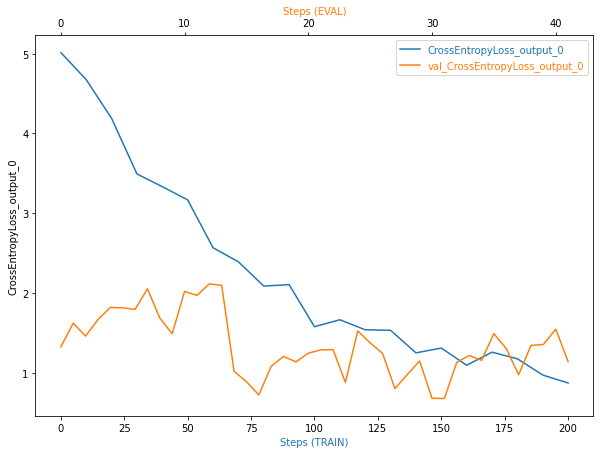

In [55]:
plot_tensor(trial, "CrossEntropyLoss_output_0")

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

The validation loss first decreases then increases as the steps increases which means we can applay early stopping to fix that. We can also use Debugger to enable auto-termination, which stops the training when a rule triggers. For our use case, doing so reduces compute time by more than half (orange curve)

In [56]:
# TODO: Display the profiler output
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
! aws s3 ls {rule_output_path} --recursive

2022-12-30 18:03:23     375685 dogImageClassifier-2022-12-30-17-38-44-543/rule-output/ProfilerReport/profiler-output/profiler-report.html
2022-12-30 18:03:23     223646 dogImageClassifier-2022-12-30-17-38-44-543/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2022-12-30 18:03:19        192 dogImageClassifier-2022-12-30-17-38-44-543/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2022-12-30 18:03:19        200 dogImageClassifier-2022-12-30-17-38-44-543/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2022-12-30 18:03:19       1717 dogImageClassifier-2022-12-30-17-38-44-543/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2022-12-30 18:03:19        127 dogImageClassifier-2022-12-30-17-38-44-543/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2022-12-30 18:03:19        199 dogImageClassifier-2022-12-30-17-38-44-543/rule-output/ProfilerReport/profiler-outp

In [57]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-439195879475/dogImageClassifier-2022-12-30-17-38-44-543/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json to ProfilerReport/profiler-output/profiler-reports/BatchSize.json
download: s3://sagemaker-us-east-1-439195879475/dogImageClassifier-2022-12-30-17-38-44-543/rule-output/ProfilerReport/profiler-output/profiler-reports/OverallSystemUsage.json to ProfilerReport/profiler-output/profiler-reports/OverallSystemUsage.json
download: s3://sagemaker-us-east-1-439195879475/dogImageClassifier-2022-12-30-17-38-44-543/rule-output/ProfilerReport/profiler-output/profiler-reports/OverallFrameworkMetrics.json to ProfilerReport/profiler-output/profiler-reports/OverallFrameworkMetrics.json
download: s3://sagemaker-us-east-1-439195879475/dogImageClassifier-2022-12-30-17-38-44-543/rule-output/ProfilerReport/profiler-output/profiler-reports/LoadBalancing.json to ProfilerReport/profiler-output/profiler-reports/LoadBalancing.json
download: s3://sag

In [58]:
import os

# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

In [59]:
import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

## Model Deploying

In [60]:
# TODO: Deploy your model to an endpoint

predictor=estimator.deploy(initial_instance_count=1, instance_type="ml.t2.medium")  # TODO: Add your deployment configuration like instance type and number of instances

INFO:sagemaker:Creating model with name: dogImageClassifier-2022-12-30-18-12-19-786
INFO:sagemaker:Creating endpoint-config with name dogImageClassifier-2022-12-30-18-12-19-786
INFO:sagemaker:Creating endpoint with name dogImageClassifier-2022-12-30-18-12-19-786


----------!

In [62]:
img_file_name = "dogImages/test/027.Bloodhound/Bloodhound_01921.jpg"
with open(img_file_name, "rb") as f:
    payload = f.read()
    
type(payload)

bytes

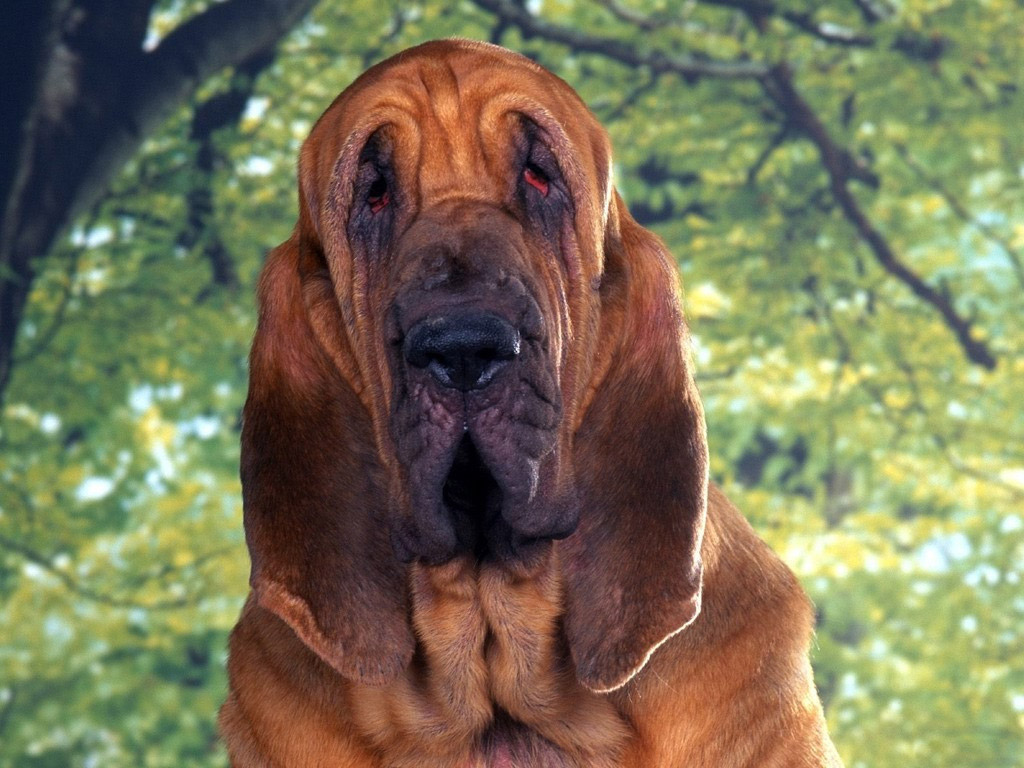

In [63]:


from PIL import Image
import io
Image.open(io.BytesIO(payload))



In [ ]:
response=predictor.predict(payload, initial_args={"ContentType": "image/jpeg"})

In [75]:
# TODO: Run an prediction on the endpoint

image = "dogImages/test/034.Boxer/Boxer_02426.jpg" # TODO: Your code to load and preprocess image to send to endpoint for prediction
response = predictor.predict(image)

In [65]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: dogImageClassifier-2022-12-30-18-12-19-786
INFO:sagemaker:Deleting endpoint with name: dogImageClassifier-2022-12-30-18-12-19-786
